<a href="https://colab.research.google.com/github/ev1025/Ticketing-Prediction/blob/main/%EC%98%88%EB%A7%A4%EC%88%98%EC%9A%94%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 프로젝트 목표(기업)

### 결과 및 측정 데이터 분석 및 예매 예측

1. 지난 경기 관람 만족도 연계 다음경기 예매 예측
   - 이겼다
   - 이겼지만 마음에 들지 않음
   - 무승부
   - 졌지만 잘싸웠다
   - 졌다   
2. 관람여부와 경기결과 및 순위에 따른 예매 예측(+고급좌석 예매 예측)
   - **관람**
      - 승리
        - 상위
        - 중위
        - 하위
      - 패배
        - 상위
        - 중위
        - 하위
   - **비관람**
      - 승리
        - 상위
        - 중위
        - 하위
      - 패배
        - 상위
        - 중위
        - 하위
     

### 예매 촉진 지표 분석 및 적정 프로모션 수준 예측

1. 경기 결과 및 순위에 따른 가격 인상,할인,프로모션 진행의 실효성
   - 가격 인상
   - 가격 할인
   - 프로모션
2. 경기 관람 만족도에 따른 분석 및 예측 모델링
   - 만족도
      - 경기장 시설(청결도, 온도조절)
      - 경기장 운영 
      - 경기내용
      - 음식의 맛
      - 관람료

### 예매 촉진을 위한 프로모션 대상자 세분화 및 촉진 방법 제안

1. 고객 세분화 및 액션아이템 고안
  - 고객 세분화
    - 적절한 할인율
    - 적절한 프로모션
    - 고급좌석이용고객 별도 세분화

### 가설

- 지난경기의 관람 여부, 순위, 경기결과에 따라 예매 수가 다를 것이다.
- 위의 가설에 해당하지 않는 고객군이 존재 할 것이다.
- 예매유도에 반응하는 고객군이 있을 것이다.
- 고급좌석 이용을 예측할 수 있다.

# 나의 생각

### 기업에서 원하는 것

- 관람여부, 경기결과, 순위가 예매에 미치는 영향 분석 및 모델링
- 마케팅에 반응하는 고객층을 찾아서 수익 극대화
- 고급좌석 이용률을 높이는 방법에 대한 고민

### 가설

- 일반팬과 골수팬을 분류할 수 있다.
- 경기의 승패는 예매와 관련이 없을 것이다.
- 관람이 뜸한 충성고객을 찾아서 다시 불러들일 수 있다.

### 프로모션(아이디어)

- 질 것 같은 경기일 수록 응원의 힘으로 승리를 이끌어야 한다.   
=> 전력상 패배가 예상되는 팀의 좌석을 예매한 고객에 한해서 그 경기가 승리할 경우 고급좌석 예매 할인 쿠폰 제공

- 승부예측    
경기의 스코어를 맞추는 고객에 한하여 쿠폰지급



# 데이터

## 데이터 전처리

In [ ]:
# 한글 그래프 폰트(런타임재시작)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.rc('font', size=15)
plt.rcParams['axes.unicode_minus'] = False # 마이너스 표시

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/더케이/membership.csv')       # 고객테이블
df2 = pd.read_csv('/content/drive/MyDrive/더케이/reserve_ticket_.csv')  # 티켓
df3 = pd.read_excel('/content/drive/MyDrive/더케이/d95e264436cf42de.xlsx',engine = 'openpyxl',names=['game_date','rank'], header=None) # 일자별 순위, (excel파일 여는방법)
df5 = pd.read_csv('/content/drive/MyDrive/더케이/survey_complete_.csv') # 설문1
df6 = pd.read_csv('/content/drive/MyDrive/더케이/survey_item.csv')      # 설문2
df7 = pd.read_csv('/content/drive/MyDrive/더케이/survey_main.csv')      # 설문3
df8 = pd.read_csv('/content/drive/MyDrive/더케이/survey_result.csv')    # 설문4

In [ ]:
# df4 경기결과 및 관중 수 
# xml 여는법 다시 찾아보기
# 인코딩 깨질 때는 encode -> decode 다시 할 것
import xml.etree.ElementTree as ET
tree = ET.parse('/content/drive/MyDrive/더케이/schedule2022120221019212245.xml', parser=ET.XMLParser(encoding='latin1')) # multi encode오류 날 때 'latin-1',  'iso-8859-5', 'cp1252'
root = tree.getroot()

empty_list = []
for i in root: # i.tag , i.attrib 알아보기
    i.attrib['yoil'] = i.attrib['yoil'].encode('latin-1').decode('euc-kr')
    i.attrib['meet_name'] = i.attrib['meet_name'].encode('latin-1').decode('euc-kr')
    i.attrib['home_team_name'] = i.attrib['home_team_name'].encode('latin-1').decode('euc-kr')
    i.attrib['away_team_name'] = i.attrib['away_team_name'].encode('latin-1').decode('euc-kr')
    i.attrib['game_type_name'] = i.attrib['game_type_name'].encode('latin-1').decode('euc-kr')
    i.attrib['field_name'] = i.attrib['field_name'].encode('latin-1').decode('euc-kr')
    empty_list.append(i.attrib)

In [ ]:
# 리스트 안의 dict[{}]를 데이터프레임으로 만들기
empty_df = pd.DataFrame() # 빈 데이터프레임 만들기
for i in empty_list:
    i = pd.DataFrame.from_dict(i, orient='index').T # dict를 dataframe으로 만들기
    empty_df = empty_df.append(i)                   # 각 dataframe을 빈데이터프레임에 추가
df4 = empty_df.reset_index(drop=True)

In [ ]:
# 잘 저장됐는지 확인
# empty_df.to_csv('/content/drive/MyDrive/더케이/schedule.csv', index=False)
# a = pd.read_csv('/content/drive/MyDrive/더케이/schedule.csv', parse_dates=["game_date"])

In [ ]:
# df1

In [ ]:
# df2 # 티켓 예매
df2.iloc[0][6] # 복사해서 추출할것
# df2[df2['match_info'] == '[하나 원큐 K 리그1 2019] 인천 유나이티드 vs 제주 유나이티드']

'[하나 원큐 K 리그1 2019] 인천 유나이티드 vs 제주 유나이티드'

In [ ]:
# from category_encoders import OrdinalEncoder

# enc1 = OrdinalEncoder(cols = 'color')
# df2 = enc1.fit_transform(df2)

In [ ]:
# df3 # 일자별 순위
year_rank = df3[df3['game_date'] > '2022.02.01'].reset_index(drop=True)
# year_rank

In [ ]:
# df4 # 2022년 경기 일정

In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   meet_year       228 non-null    object
 1   meet_seq        228 non-null    object
 2   meet_name       228 non-null    object
 3   game_id         228 non-null    object
 4   game_date       228 non-null    object
 5   yoil            228 non-null    object
 6   game_time       228 non-null    object
 7   home_team       228 non-null    object
 8   home_team_name  228 non-null    object
 9   home_team_goal  222 non-null    object
 10  home_team_tk    222 non-null    object
 11  away_team       228 non-null    object
 12  away_team_name  228 non-null    object
 13  away_team_goal  222 non-null    object
 14  away_team_tk    222 non-null    object
 15  field_id        228 non-null    object
 16  field_name      228 non-null    object
 17  game_type       228 non-null    object
 18  game_type_

In [ ]:
df4.dropna(inplace=True,axis=0)

**tk(승부차기) 컬럼 삭제, 연도와 각 팀, 경기장의 id번호 삭제**

In [ ]:
df4['home_team_tk'].unique()

array(['0'], dtype=object)

In [ ]:
df4['away_team_tk'].unique()

array(['0'], dtype=object)

In [ ]:
df4.drop(columns = ['home_team_tk','away_team_tk','meet_year','meet_seq','meet_name','home_team','away_team','field_id'],inplace=True,)

In [ ]:
# 숫자데이터 숫자로 변경
df4[['audience','home_team_goal','away_team_goal']] = df4[['audience','home_team_goal','away_team_goal']].astype(int)

# 날짜데이터 datetime변경
df4['game_date'] = pd.to_datetime(df4['game_date'])

df4['yoil'] = df4['yoil'].replace({'월':0,'화':1,'수':2,'목':3,'금':4,'토':5,'일':6})

## 데이터 분석

#### (가설3)경기결과가 예매에 영향을 끼치는가?(df4) => yes

In [ ]:
# # 승패 기록하기 홈팀, 원정팀 따로(실패)
# def game_result(data):
#     data['result_h'] = 0 # 홈팀 결과
#     data['result_a'] = 0 # 원정팀 결과

#     data['past_h'] = 0 # 홈팀 지난경기
#     data['past_a'] = 0 # 원정팀 지난경기
    
#     # 경기결과
#     for i in range(len(data)):
#         if data['home_team_goal'][i] > data['away_team_goal'][i]:
#             data['result_h'][i] = 1
#             data['result_a'][i] = -1
#         elif data['home_team_goal'][i] < data['away_team_goal'][i]:
#             data['result_h'][i] = -1
#             data['result_a'][i] = 1
#     return data

# game_result(df4)

# 경기결과 승패로 기록하기
# def past_result(data,team):
#     sample = data[(data['home_team_name']==team) | (data['away_team_name']==team)].reset_index(drop=True)
#     sample['result'] = 0
#     for i in range(len(sample))[1:]:
#         if (sample['home_team_name'][i-1] == team)&(sample['result_h'][i-1]==1):
#             sample['result'][i] = '승리'
#         elif (sample['home_team_name'][i-1] == team)&(sample['result_h'][i-1]==-1):
#             sample['result'][i] = '패배'
#         elif (sample['away_team_name'][i-1] == team) & (sample['result_a'][i-1]==1):
#             sample['result'][i] = '승리'
#         elif (sample['away_team_name'][i-1] == team) & (sample['result_a'][i-1]==-1):
#             sample['result'][i] = '패배'
#         elif (sample['result_a'][i-1]==0):
#             sample['result'][i] = '무승부'
#     return sample
# seoul = past_result(df4,'서울')
# seoul

In [ ]:
# # 팀별 result 컬럼생성, 직전 경기 기록(실패)
# def past_result(data, team):
#     # data['result'] = 0
#     for i in range(len(data)):
#         if (data['home_team_name'][i]==team) and (data['home_team_goal'][i] > data['away_team_goal'][i]):
#             data['result'][i] = '승리'
#         elif (data['home_team_name'][i]==team) and (data['home_team_goal'][i] < data['away_team_goal'][i]):
#             data['result'][i] = '패배'
#         elif (data['away_team_name'][i]==team) and (data['home_team_goal'][i] < data['away_team_goal'][i]):
#             data['result'][i] = '승리'
#         elif (data['away_team_name'][i]==team) and (data['home_team_goal'][i] > data['away_team_goal'][i]):
#             data['result'][i] = '패배'       
#         elif (data['away_team_name'][i]==team) and (data['home_team_goal'][i] == data['away_team_goal'][i]):
#             data['result'][i] = '무승부'
#     data = data[(data['home_team_name']==team) | (data['away_team_name']==team)]
#     return data

In [ ]:
# # 실패
# def past_result(data, team):
#     data['result'] = 0
#     for i in range(len(data)):
#         if (data['home_team_name'][i]==team) and (data['home_team_goal'][i] > data['away_team_goal'][i]):
#             data['result'][i] = '승리'
#         elif (data['home_team_name'][i]==team) and (data['home_team_goal'][i] < data['away_team_goal'][i]):
#             data['result'][i] = '패배'
#         elif (data['away_team_name'][i]==team) and (data['home_team_goal'][i] < data['away_team_goal'][i]):
#             data['result'][i] = '승리'
#         elif (data['away_team_name'][i]==team) and (data['home_team_goal'][i] > data['away_team_goal'][i]):
#             data['result'][i] = '패배'       
#         elif (data['home_team_goal'][i] == data['away_team_goal'][i]):
#             data['result'][i] = '무승부'

#     data = data[(data['home_team_name']==team)|(data['away_team_name']==team)]
#     data.result = data.result.shift()
#     return data

# sample = past_result(df4,'서울')
# sample

# df4.loc[sample[sample['away_team_name']=='서울'].index]['past_a'] = sample[sample['away_team_name']=='서울']['result']

In [ ]:
# 승패 기록하기 홈팀, 원정팀
def game_result(data):
    data['result_h'] = 0 # 홈팀 결과
    data['result_a'] = 0 # 원정팀 결과
    
    # 경기결과
    for i in range(len(data)):
        if data['home_team_goal'][i] > data['away_team_goal'][i]:
            data['result_h'][i] = 1
            data['result_a'][i] = -1
        elif data['home_team_goal'][i] < data['away_team_goal'][i]:
            data['result_h'][i] = -1
            data['result_a'][i] = 1
    return data

game_result(df4);

In [ ]:
# 팀별 직전 경기 결과 수정을 위해 인덱스 저장
def index_save(data, team):
    home_index = data[data['home_team_name']==team].index
    away_index = data[data['away_team_name']==team].index
    all_index = data[(data['home_team_name']==team)|(data['away_team_name']==team)].index
    return home_index, away_index, all_index

In [ ]:
# 직전 경기결과 컬럼을 삽입하는 함수(past_h, past_a)
def past_result(data,team):
    data['past_h'] = 0 # 홈팀 지난경기
    data['past_a'] = 0 # 원정팀 지난경기
    
    # 직전 경기의 shift진행을 위해 분류 및 인덱스 초기화
    sample = data[(data['home_team_name']==team) | (data['away_team_name']==team)].reset_index(drop=True)

    # 결과 기록할 컬럼 생성
    sample['result'] = 0 
    
    # 결과기록
    # 첫경기는 직전경기가 없어서 1부터 시작[1:]
    # 직전 경기 결과를 저장하기 위해 [i-1]
    # 승리 = 1, 패배 = -1 , 무승부 = 0
    for i in range(len(sample))[1:]:
        if (sample['home_team_name'][i-1] == team)&(sample['result_h'][i-1]==1):
            sample['result'][i] = 1
        elif (sample['home_team_name'][i-1] == team)&(sample['result_h'][i-1]==-1):
            sample['result'][i] = -1
        elif (sample['away_team_name'][i-1] == team) & (sample['result_a'][i-1]==1):
            sample['result'][i] = 1
        elif (sample['away_team_name'][i-1] == team) & (sample['result_a'][i-1]==-1):
            sample['result'][i] = -1
        elif (sample['result_a'][i-1]==0):
            sample['result'][i] = 0
    
    # 결과기록 완료 후 인덱스 재지정(위에 만든 index_save함수)
    home_index, away_index, sample.index = index_save(data, team)

    # 인덱스별로 직전경기 결과를 past_컬럼에 넣기
    data.loc[home_index,'past_h'] = sample.loc[home_index,'result']
    data.loc[away_index,'past_a'] = sample.loc[away_index,'result']

    return sample

In [ ]:
# 직전 결과 함수 적용
for i in df4.away_team_name.unique():
    past_result(df4, i)
# df4.iloc[:,[4,5,6,7,12,13,14,15]]

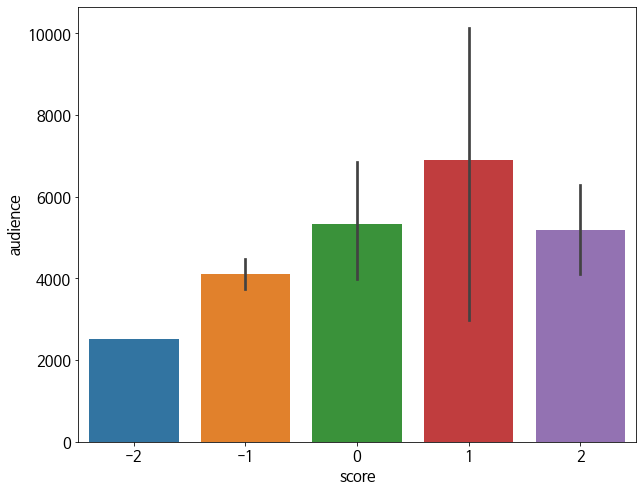

In [ ]:
# 인천경기장 기준 직전 경기의 승패가 예매에 영향을 주는지
# -2 : 두팀 모두 직전경기 패배 / 2 : 두팀 모두 직전경기 승리
# 직전 경기가 승리했을 때 그 팀의 예매가 많은 편

past_df = df4[df4['field_name']=='인천'][['away_team_name', 'audience']]
past_df['score'] = df4[df4['field_name']=='인천']['past_h'] + df4[df4['field_name']=='인천']['past_a']

plt.figure(figsize=(10,8))
sns.barplot(data= past_df, x='score',y='audience')
# plt.bar(past_df.score, past_df.audience)
plt.show();


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


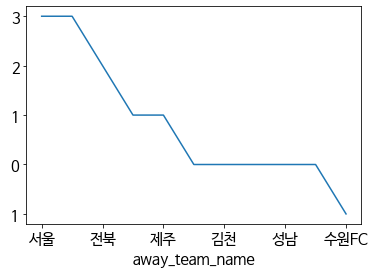

In [ ]:
# 확실하게 확인하기 위해, 직전 경기 성적이 좋은 팀 순위를 비교
past_rank = df4[df4['field_name']=='인천'].groupby('away_team_name')['past_h'].sum() + df4[df4['field_name']=='인천'].groupby('away_team_name')['past_a'].sum()
past_rank.sort_values(ascending=False).plot(kind='line')
plt.show();

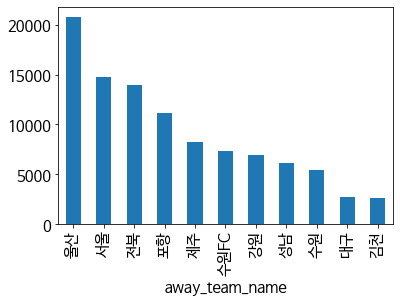

In [ ]:
# 상위 5개의 순위 팀 경기가 관람객도 많음
past_df.groupby('away_team_name')['audience'].sum().sort_values(ascending=False).plot(kind='bar')

<ipython-input-228-666043c538ce>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  past_all['score'] = df4['past_h'] + df4['past_a']


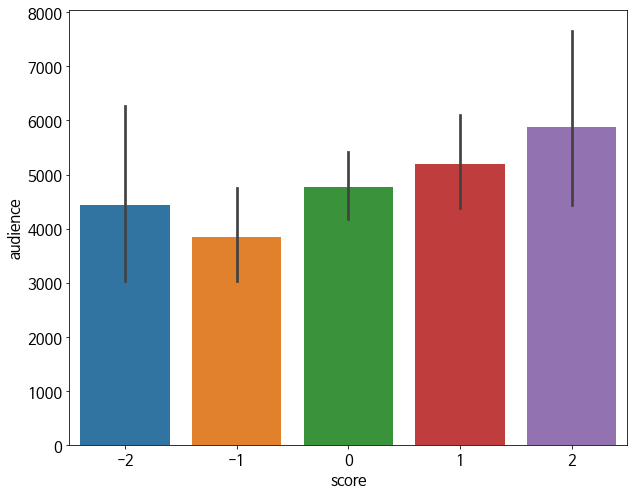

In [ ]:
# 인천경기장에만 해당되는 것인지 궁금하여
# 전체 결과에서 직전 경기의 승패가 예매에 영향을 주는지 비교
# 마찬가지로 직전 경기에서 승리한 경우가 예매가 가장 많은 것으로 나타남

past_all = df4[['home_team_name','away_team_name','audience']]
past_all['score'] = df4['past_h'] + df4['past_a']

plt.figure(figsize=(10,8))
sns.barplot(data= past_all, x='score',y='audience')
plt.show();

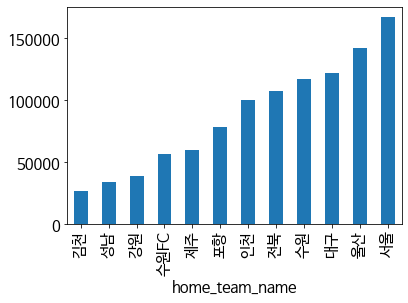

In [ ]:
# 전체 홈경기장 인기 순위에서도 비슷한 결과를 보였고
df4.groupby('home_team_name')['audience'].sum().sort_values(ascending=True).plot(kind='bar')
plt.show()

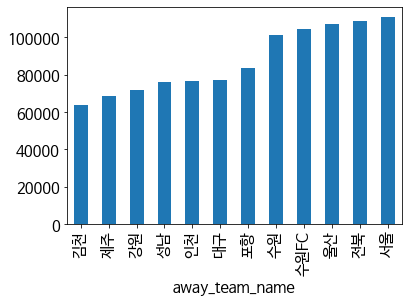

In [ ]:
# 전체 원정경기에서도 마찬가지
df4.groupby('away_team_name')['audience'].sum().sort_values(ascending=True).plot(kind='bar')
plt.show()

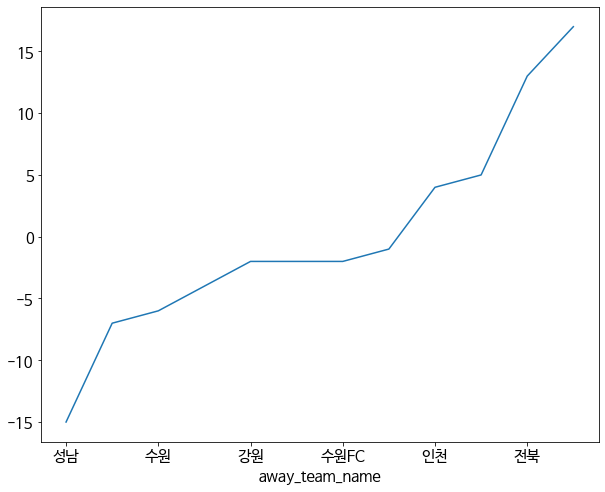

In [ ]:
# K리그 순위
past_rank_all = df4.groupby('away_team_name')['result_a'].sum() + df4.groupby('home_team_name')['result_h'].sum()

plt.figure(figsize=(10,8))
past_rank_all.sort_values(ascending=True).plot(kind='line')
plt.show();

In [ ]:
# 경기 당 관람객을 팀당 50 : 50 으로 나누었을 때
all_audience = df4.groupby('home_team_name')[['audience']].sum() + df4.groupby('away_team_name')[['audience']].sum()
all_audience/2
all_audience = all_audience.sort_values(by='audience', ascending=True).reset_index()

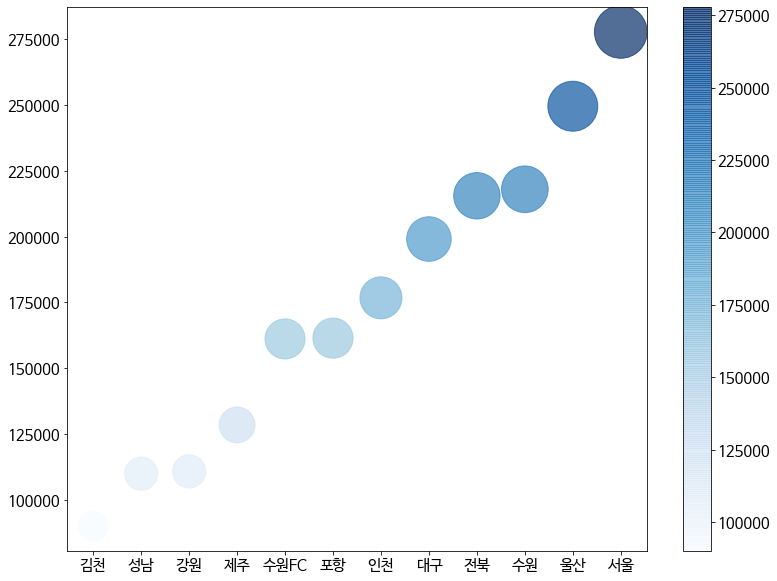

In [ ]:
# 팀당 관람객 순위
plt.figure(figsize = (13,10))
plt.scatter(all_audience.home_team_name,
            all_audience.audience,
            alpha = 0.7,
            s = all_audience.audience/100,
            c = all_audience.audience,
            cmap='Blues')
plt.colorbar()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


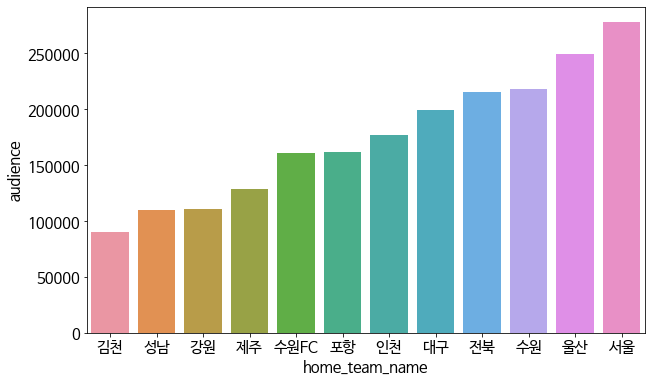

In [ ]:
# 전체 관람객 순위
plt.figure(figsize=(10,6))
sns.barplot(all_audience['home_team_name'], all_audience['audience'])
plt.show();

결론적으로 대부분의 지역에서 직전 경기결과에 따라 예매가 높게 나타났다.     
**따라서 본인이 응원하는 승리할 경우 팀의 경우 선착순으로 고급좌석 할인 티켓을 판매하는 방안을 추진**   


### 시간대별 요일별 경기 수 (df4)

**요일별 시간별 경기 수**

In [ ]:
# 요일별,시간대별 히트맵
data_count = df4.pivot_table(index='yoil', columns='game_time', values='game_id', aggfunc=['count']) # aggfunc는 값에 적용해줄 함수
data_count.index = ['월','화','수','목','금','토','일']
data_count.columns = [i[1] for i in data_count.columns]

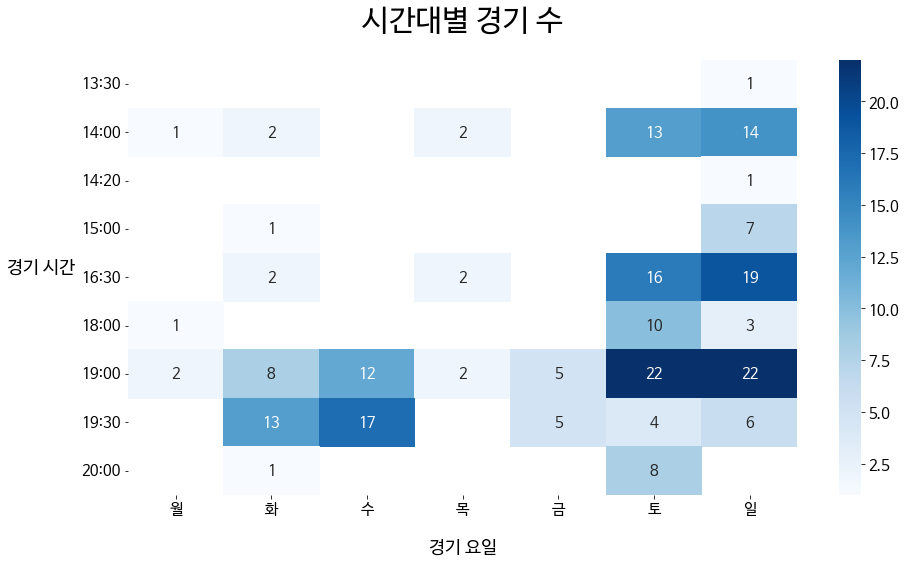

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(data_count.T,cmap='Blues', annot=True)
plt.yticks(rotation='horizontal')
plt.ylabel('경기 시간', fontsize=18, labelpad=40, rotation='horizontal')
plt.xlabel('경기 요일', fontsize=18, labelpad=20)
plt.title('시간대별 경기 수',pad = 30, size=30)
plt.show();

In [ ]:
data_audi = df4.pivot_table(index='yoil', columns='game_time', values='audience', aggfunc=lambda x : sum(x)/10000) # aggfunc는 값에 적용해줄 함수
data_audi.index = ['월','화','수','목','금','토','일']

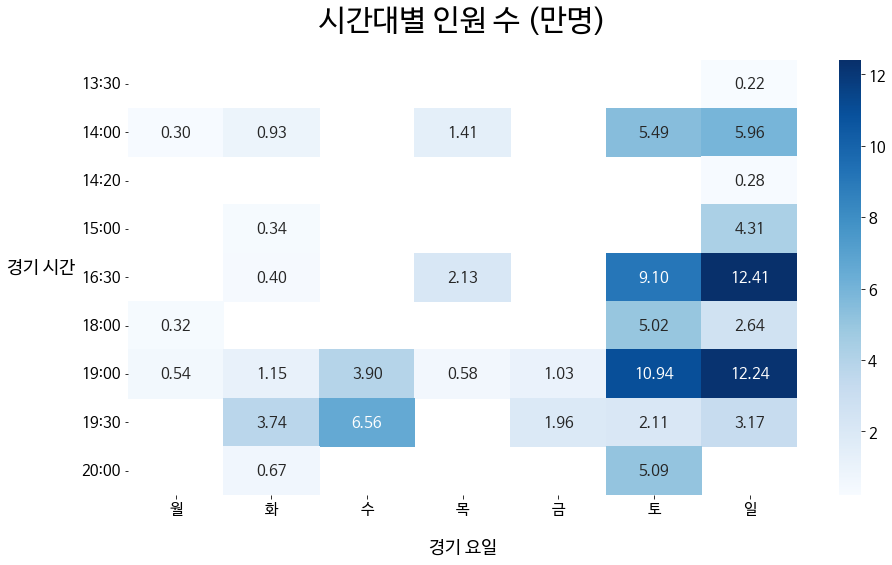

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(data_audi.T,cmap='Blues', annot=True, fmt='.2f')
plt.yticks(rotation='horizontal')
plt.ylabel('경기 시간', fontsize=18, labelpad=40, rotation='horizontal')
plt.xlabel('경기 요일', fontsize=18, labelpad=20)
plt.title('시간대별 인원 수 (만명)',pad = 30, size=30)
plt.show();

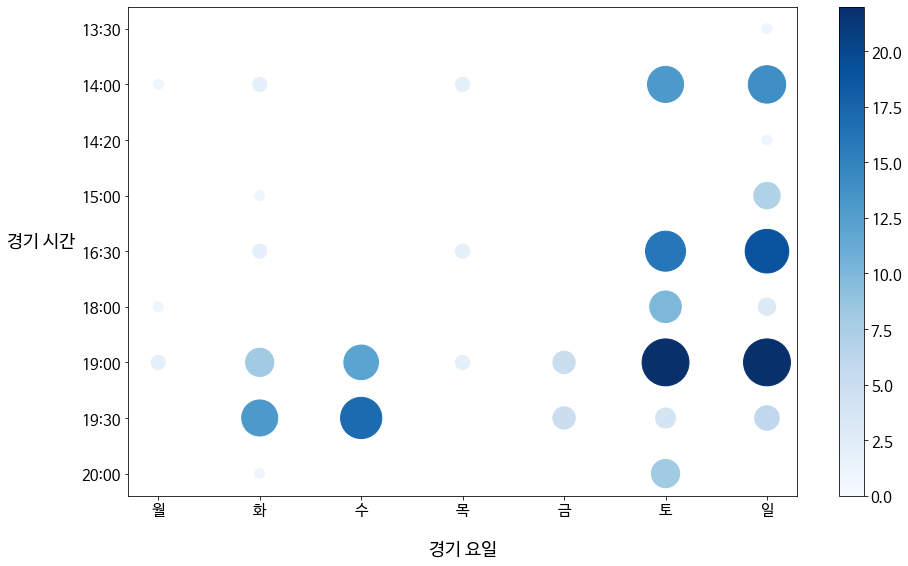

In [ ]:
# 요일과 시간별 경기 수
group_day = df4.groupby(['yoil','game_time'])[['game_id']].count()
group_day.reset_index(inplace=True)

# 데이터가 월화수목금토일 순으로 정렬되도록
group_day.sort_values(by='yoil',inplace=True)
group_day.sort_values(by='game_time',inplace=True,ascending=False)


plt.figure(figsize=(15,9))
plt.scatter(group_day.yoil,
            group_day.game_time,
            s = group_day.game_id*100,
            c = group_day.game_id,
            cmap='Blues',
            vmin =0,
            vmax = group_day.game_id.max())
plt.xticks(range(group_day['yoil'].nunique()),['월','화','수','목','금','토','일'])
plt.colorbar()
plt.ylabel('경기 시간', fontsize=18, labelpad=40, rotation='horizontal')
plt.xlabel('경기 요일', fontsize=18, labelpad=20)
plt.show();

**요일별 시간별 관객 수**

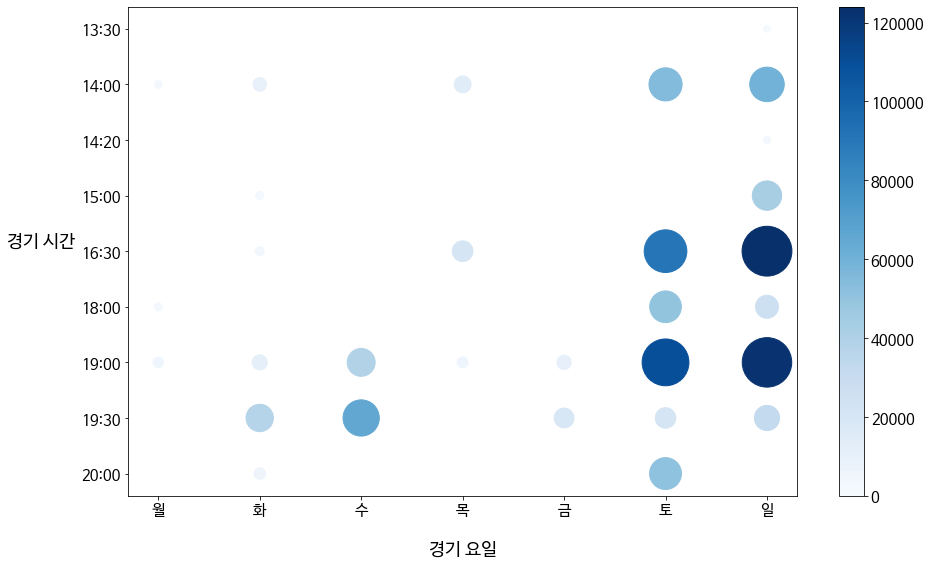

In [ ]:
# 요일,시간별 관객수
group_day2 = df4.groupby(['yoil','game_time'])[['audience']].sum()
group_day2.reset_index(inplace=True)

# 데이터가 월화수목금토일 순으로 정렬되도록
group_day2['yoil'].replace({'월':0,'화':1,'수':2,'목':3,'금':4,'토':5,'일':6},inplace=True)
group_day2.sort_values(by='yoil',inplace=True)
group_day2.sort_values(by='game_time',inplace=True,ascending=False)


plt.figure(figsize=(15,9))
plt.scatter(group_day2.yoil,
            group_day2.game_time,
            s = group_day2.audience/50,
            c = group_day2.audience,
            cmap='Blues',
            vmin =0,
            vmax = group_day2.audience.max())
plt.xticks(range(group_day2['yoil'].nunique()),['월','화','수','목','금','토','일'])
plt.colorbar()
plt.ylabel('경기 시간', fontsize=18, labelpad=40, rotation='horizontal')
plt.xlabel('경기 요일', fontsize=18, labelpad=20)
plt.show();